In [1]:
import wrangle

### goals:
- use time series analysis to predict peak visitor periods, both overall and at each park
- identify distributions of total visits
- identify trends and seasonality
- run a seasonal decomposition to identify influence of various time related factors
- make a predciitive model for time- series:
    - linear regression
    - HOLTZ-WINTERS adjusted linear model
    - seasonal overlay
    - fb prophet 

In [2]:
df = wrangle.cleaned_and_prepped_NPS_visitors()
df.head()

,yellowstone,grand_canyon,rocky_mtn,zion,great_smoky_mtns
date,,,,,
1979-01-01,23605,37002,53585,8994,130261
1979-02-01,31992,46043,85931,12106,160764
1979-03-01,17813,91927,75070,23079,309163
1979-04-01,34095,123643,66873,63306,650485
1979-05-01,108952,205048,79577,122964,666017


In [3]:
import acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [4]:
df.index

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', name='date', length=521, freq=None)

In [5]:
# # plotting defaults
# plt.rc('figure', figsize=(10, 6))
# plt.style.use('seaborn-whitegrid')


In [6]:
print("Date Range is: ", df.index.min(), 'to', df.index.max())
print('Shape', df.shape[0])

Date Range is:  1979-01-01 00:00:00 to 2022-05-01 00:00:00
Shape 521


In [7]:
df['total_visits'] = df.yellowstone + df.grand_canyon + df.great_smoky_mtns + df.zion + df.rocky_mtn

In [8]:
df.head()

,yellowstone,grand_canyon,rocky_mtn,zion,great_smoky_mtns,total_visits
date,,,,,,
1979-01-01,23605,37002,53585,8994,130261,253447
1979-02-01,31992,46043,85931,12106,160764,336836
1979-03-01,17813,91927,75070,23079,309163,517052
1979-04-01,34095,123643,66873,63306,650485,938402
1979-05-01,108952,205048,79577,122964,666017,1182558


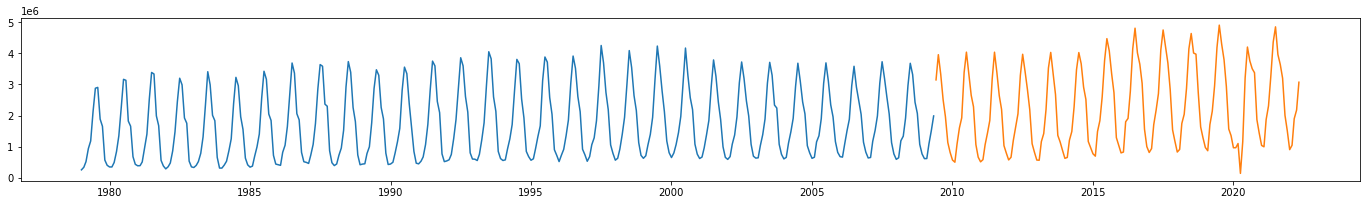

In [9]:
# Percentage Based split
train_size = 0.70
n = df.shape[0]
test_start_index = round(train_size * n)

# train is the data up to the 70% cut line
train = df[:test_start_index]
# test is the data after the 70% cut line
test = df[test_start_index:]

plt.rc('figure', figsize=(24, 3))
plt.plot(train.index, train.total_visits)
plt.plot(test.index, test.total_visits)


In [10]:
train.columns

Index(['yellowstone', 'grand_canyon', 'rocky_mtn', 'zion', 'great_smoky_mtns',
       'total_visits'],
      dtype='object')

In [11]:
y1 = train.total_visits
y2 = train.yellowstone
y3 = train.grand_canyon
y4 = train.rocky_mtn
y5 = train.zion
y6 = train.great_smoky_mtns

In [12]:
y1.index = pd.to_datetime(y1.index)
y2.index = pd.to_datetime(y2.index)
y3.index = pd.to_datetime(y3.index)
y4.index = pd.to_datetime(y4.index)
y5.index = pd.to_datetime(y5.index)
y6.index = pd.to_datetime(y6.index)

## First, let's take a look at the overall distribution of annual visitors, independent of time

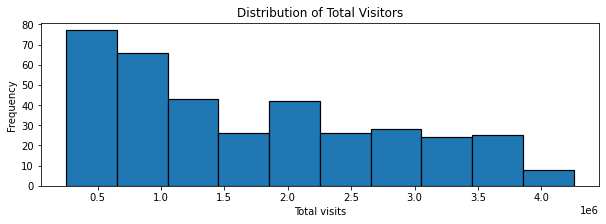

In [13]:
# Histogram
plt.rc('figure', figsize=(10, 3))
plt.title('Distribution of Total Visitors')
plt.xlabel('Total visits')
y1.plot.hist(linewidth=1.2, edgecolor='black')
plt.rc('font', size=5)

### Takeaways:
- for aggregate visits to the 5 parks ('total visitors'):
    - there's a fairly normal right skewed distribution peaking at 75 months with ~500,000 visitors, with an unexpected mini-peak at 2mn visitors.
    - this makes sense: most months tend to be 'off' months, with usage peaking in most parks 3-4 months/year, or 25% percent of the time
    - let's take a look at individual park distributions

<AxesSubplot:title={'center':'Distribution of Yellowstone Visitors'}, xlabel='Yelloswtone visits', ylabel='Frequency'>

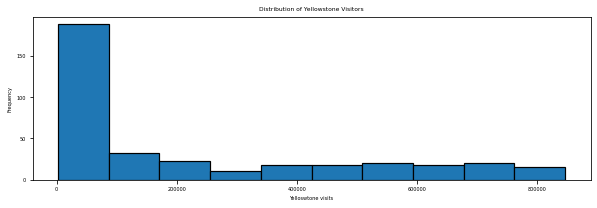

In [14]:
# Histogram
plt.rc('figure', figsize=(10, 3))
plt.title('Distribution of Yellowstone Visitors')
plt.xlabel('Yelloswtone visits')
plt.rc('font', size=15)
y2.plot.hist(linewidth=1.2, edgecolor='black')


#y1 = train.total_visits
# y2 = train.yellowstone
# y3 = train.grand_canyon
# y4 = train.rocky_mtn
# y5 = train.zion
# y6 = train.great_smoky_mtns

<AxesSubplot:title={'center':'Distribution of Grand Canyon Visitors'}, xlabel='Grand Canyon Visitors', ylabel='Frequency'>

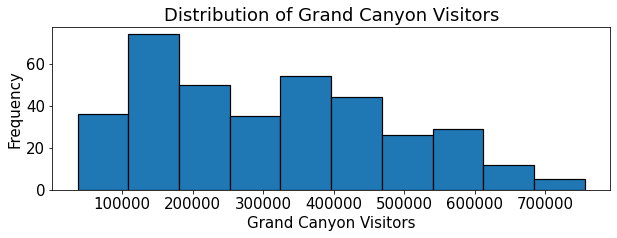

In [15]:
# Histogram
plt.rc('figure', figsize=(10, 3))
plt.title('Distribution of Grand Canyon Visitors')
plt.xlabel('Grand Canyon Visitors')
y3.plot.hist(linewidth=1.2, edgecolor='black')

#y1 = train.total_visits
# y2 = train.yellowstone
# y3 = train.grand_canyon
# y4 = train.rocky_mtn
# y5 = train.zion
# y6 = train.great_smoky_mtns

<AxesSubplot:title={'center':'Distribution of Rocky MTN Visitors'}, xlabel='Rocky MTN Visitors', ylabel='Frequency'>

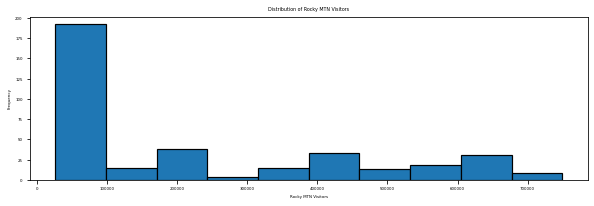

In [16]:
# Histogram

plt.rc('font', size=4) 
plt.rc('figure', figsize=(10, 3))
plt.title('Distribution of Rocky MTN Visitors')
plt.xlabel('Rocky MTN Visitors')
y4.plot.hist(linewidth=1.2, edgecolor='black')

#y1 = train.total_visits
# y2 = train.yellowstone
# y3 = train.grand_canyon
# y4 = train.rocky_mtn
# y5 = train.zion
# y6 = train.great_smoky_mtns

<AxesSubplot:title={'center':'Distribution of Zion Visitors'}, xlabel='Zion Visitors', ylabel='Frequency'>

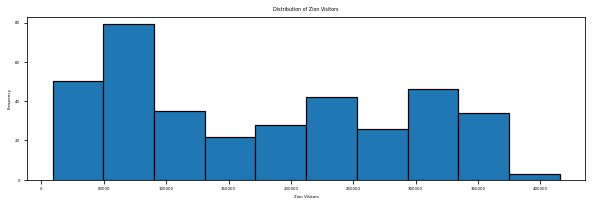

In [17]:
# Histogram
plt.title('Distribution of Zion Visitors')
plt.xlabel('Zion Visitors')
plt.rc('font', size=15)
y5.plot.hist(linewidth=1.2, edgecolor='black')

#y1 = train.total_visits
# y2 = train.yellowstone
# y3 = train.grand_canyon
# y4 = train.rocky_mtn
# y5 = train.zion
# y6 = train.great_smoky_mtns

<AxesSubplot:title={'center':'Distribution of Great Smoky Mountain Visitors'}, xlabel='Great Smoky Mountain Visitors', ylabel='Frequency'>

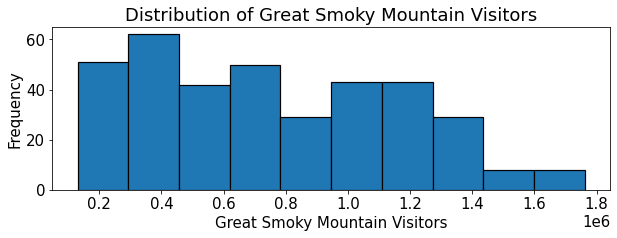

In [18]:
# Histogram
plt.title('Distribution of Great Smoky Mountain Visitors')
plt.xlabel('Great Smoky Mountain Visitors')
plt.rc('font', size=15)
y6.plot.hist(linewidth=1.2, edgecolor='black')

#y1 = train.total_visits
# y2 = train.yellowstone
# y3 = train.grand_canyon
# y4 = train.rocky_mtn
# y5 = train.zion
# y6 = train.great_smoky_mtns

## Now let's look at monthly trends within the years
    - create a month column with number and month name
    - look at monthly visitors overall and by park

In [19]:
train['month'] = train.index.strftime('%m-%b')
train.head()

,yellowstone,grand_canyon,rocky_mtn,zion,great_smoky_mtns,total_visits,month
date,,,,,,,
1979-01-01,23605,37002,53585,8994,130261,253447,01-Jan
1979-02-01,31992,46043,85931,12106,160764,336836,02-Feb
1979-03-01,17813,91927,75070,23079,309163,517052,03-Mar
1979-04-01,34095,123643,66873,63306,650485,938402,04-Apr
1979-05-01,108952,205048,79577,122964,666017,1182558,05-May


<AxesSubplot:xlabel='month'>

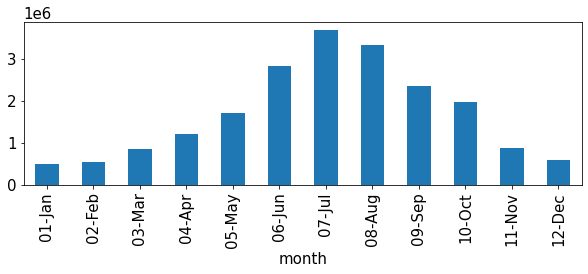

In [20]:
train.groupby(train.month).total_visits.mean().plot.bar()

In [21]:
train.groupby('month').total_visits.describe().round(2).T

month,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
count,31.00,31.00,31.00,31.00,31.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,503596.81,552228.35,853788.74,1205323.06,1716584.32,2819957.10,3681287.43,3331919.03,2354933.03,1960732.00,886929.30,602003.07
std,124131.30,132272.89,228824.90,227879.89,240521.19,275458.84,321146.73,258124.65,273037.77,202116.49,198537.31,168049.82
min,253447.00,336836.00,474452.00,786346.00,1182558.00,2130857.00,2879067.00,2906446.00,1822682.00,1554141.00,533096.00,310960.00
25%,404015.50,426585.00,704361.00,994849.00,1557150.50,2707588.25,3494922.50,3142960.00,2110947.50,1836914.75,740573.50,433541.25
50%,539665.00,577440.00,912430.00,1260712.00,1766793.00,2927304.50,3704083.00,3309249.00,2432082.50,2013640.00,857868.50,635565.00
75%,610398.00,657583.50,1064008.00,1386512.50,1904744.50,3028508.00,3847561.00,3576580.25,2578193.00,2120477.25,1075846.50,757768.00
max,678438.00,798103.00,1189708.00,1522916.00,1987834.00,3165033.00,4254803.00,3824733.00,2794044.00,2300928.00,1182092.00,824865.00


### The summer months (JUN-AUG) are the most popular segment. 
- is this trend the across parks?

In [22]:
train.columns

Index(['yellowstone', 'grand_canyon', 'rocky_mtn', 'zion', 'great_smoky_mtns',
       'total_visits', 'month'],
      dtype='object')

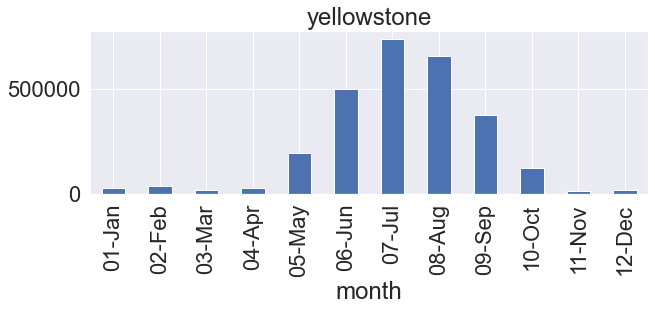

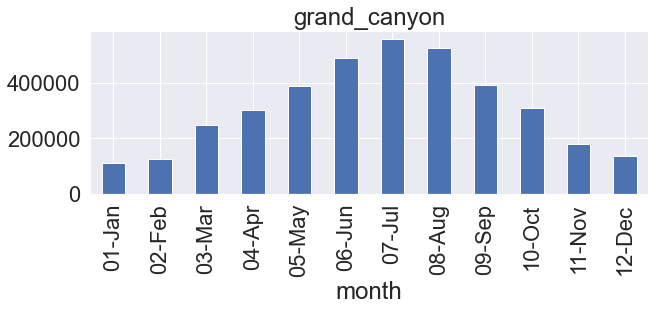

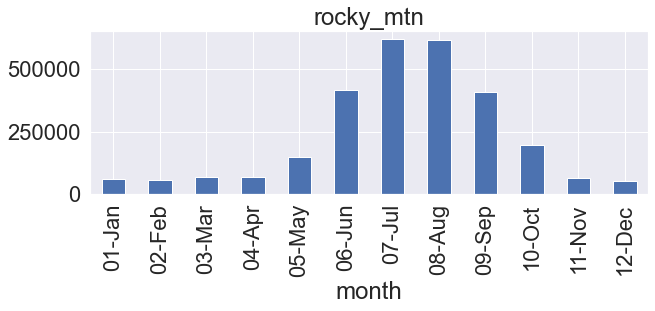

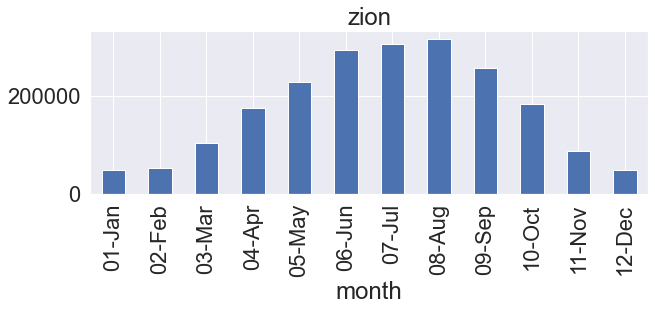

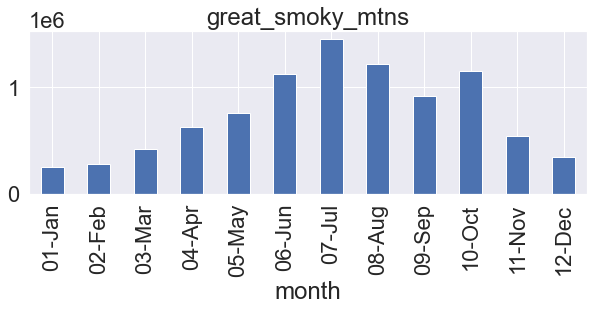

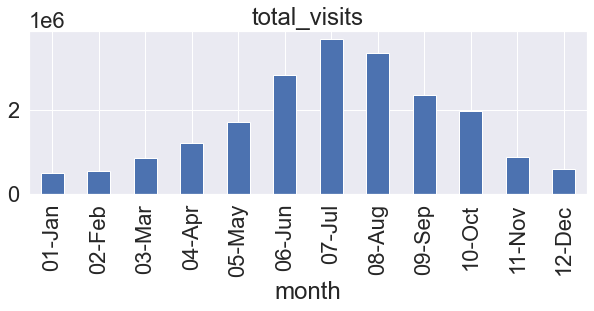

In [30]:
# def park_popularity_by_month(df):
columns = ['yellowstone', 'grand_canyon', 'rocky_mtn', 'zion', 'great_smoky_mtns', 'total_visits']
for col in columns:
    train.groupby(train.month)[col].mean().plot.bar(title=col)
    plt.rc('font', size=15)
    plt.show()

## Takeaway: Great Smoky Mountains is the only NP with a non-Summer month in the top-3 most visited months (OCT is the third most popular month)

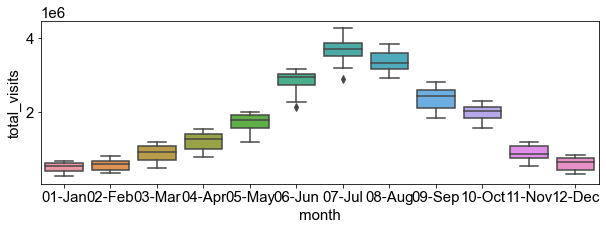

In [24]:
sns.boxplot(data = train, x = train.month, y = train.total_visits)
sns.set(font_scale=2)

## Does this trend hold true across decades?

In [25]:
print("Date Range is: ", train.index.min(), 'to', train.index.max())
print('Shape', train.shape[0])

Date Range is:  1979-01-01 00:00:00 to 2009-05-01 00:00:00
Shape 365


In [26]:
train.head()
train.columns

Index(['yellowstone', 'grand_canyon', 'rocky_mtn', 'zion', 'great_smoky_mtns',
       'total_visits', 'month'],
      dtype='object')

In [27]:
the_1970s_yellowstone = pd.DataFrame(train.groupby(train.month).mean().yellowstone[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])
the_1970s_grand_canyon = pd.DataFrame(train.grand_canyon[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])
the_1970s_great_smoky_mtns = pd.DataFrame(train.great_smoky_mtns[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])
the_1970s_zion = pd.DataFrame(train.zion[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])
the_1970s_rocky_mtn = pd.DataFrame(train.rocky_mtn[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])
the_1970s_total_visits = pd.DataFrame(train.total_visits[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])

the_1980s_yellowstone = pd.DataFrame(train.yellowstone[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])
the_1980s_grand_canyon = pd.DataFrame(train.grand_canyon[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])
the_1980s_great_smoky_mtns = pd.DataFrame(train.great_smoky_mtns[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])
the_1980s_zion = pd.DataFrame(train.zion[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])
the_1980s_rocky_mtn = pd.DataFrame(train.rocky_mtn[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])
the_1980s_total_visits = pd.DataFrame(train.total_visits[(train.index >= '1980-01-01') & (train.index < '1990-01-01')])

the_1990s_yellowstone = pd.DataFrame(train.yellowstone[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])
the_1990s_grand_canyon = pd.DataFrame(train.grand_canyon[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])
the_1990s_great_smoky_mtns = pd.DataFrame(train.great_smoky_mtns[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])
the_1990s_zion = pd.DataFrame(train.zion[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])
the_1990s_rocky_mtn = pd.DataFrame(train.rocky_mtn[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])
the_1990s_total_visits = pd.DataFrame(train.total_visits[(train.index >= '1990-01-01') & (train.index < '2000-01-01')])

the_2000s_yellowstone = pd.DataFrame(train.yellowstone[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])
the_2000s_grand_canyon = pd.DataFrame(train.grand_canyon[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])
the_2000s_great_smoky_mtns = pd.DataFrame(train.great_smoky_mtns[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])
the_2000s_zion = pd.DataFrame(train.zion[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])
the_2000s_rocky_mtn = pd.DataFrame(train.rocky_mtn[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])
the_2000s_total_visits = pd.DataFrame(train.total_visits[(train.index >= '2000-01-01') & (train.index < '2010-01-01')])



In [31]:
the_1970s_yellowstone = pd.DataFrame(train.groupby(train.month).mean().yellowstone[(train.index >= '1970-01-01') & (train.index < '1980-01-01')])

IndexError: Boolean index has wrong length: 365 instead of 12

In [28]:
the_1970s_yellowstone.head()

,yellowstone
date,
1979-01-01,23605
1979-02-01,31992
1979-03-01,17813
1979-04-01,34095
1979-05-01,108952


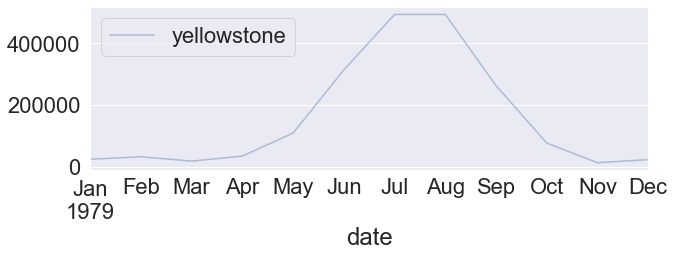

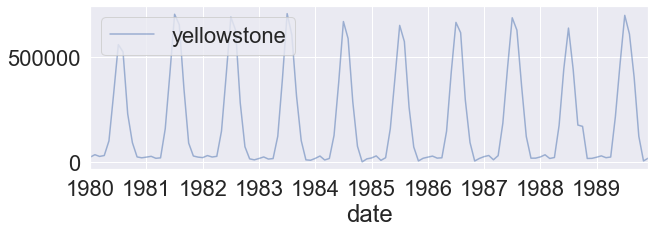

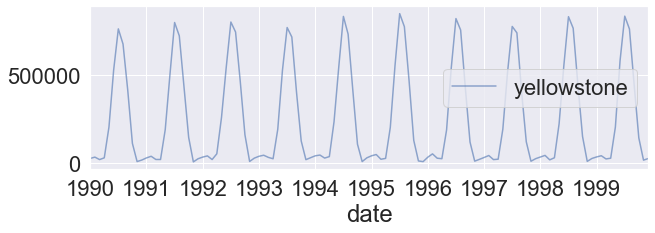

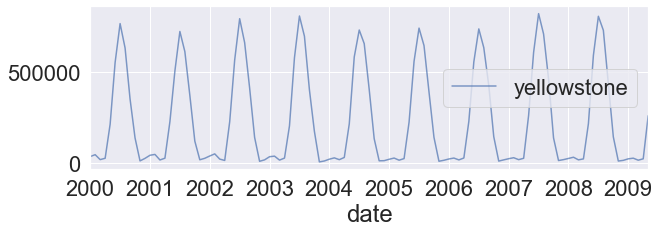

In [29]:
the_1970s_yellowstone.plot(alpha=.4, label='1970s')
the_1980s_yellowstone.plot(alpha=.5, label='1980s')
the_1990s_yellowstone.plot(alpha=.6, label='1990s')
the_2000s_yellowstone.plot(alpha=.7, label='2000s')
plt.legend()